In [1]:
import sys
sys.path.append('C:/Users/TomFi/Desktop/Cours/Projet IA/neuroforest-master')
from typing import List
from pathlib import Path

import json
import re
import numpy as np
from tqdm import tqdm

from neuroforest.dataset import dataloader, TimeStampedCoordinates, SESSION_TYPES, Coordinates

import matplotlib.pyplot as plt


Loading data from : C:\Users\TomFi\Desktop\Cours\Projet IA\data_2022\trajectories_processed


In [2]:
def to_vect(coordinates: List[Coordinates]) -> np.ndarray:
    return np.array([coord.to_vect() for coord in coordinates])


def get_idle_segments_lengths(player_coords: List[TimeStampedCoordinates]) -> list[int]:
    coords = to_vect([c["coord"] for c in player_coords])
    deriv = coords[1:] - coords[:-1]
    player_dist = np.linalg.norm(deriv, axis=1)
    zero_indices = np.where(player_dist == 0)[0]
    zero_indices_segments = np.split(zero_indices, np.where(np.diff(zero_indices) != 1)[0] + 1)
    return [a.shape[0] for a in zero_indices_segments]


all_lengths = []
for sample in dataloader:
    for session_type in SESSION_TYPES:
        trial = sample[session_type]
        if trial is not None:
            print(f"{sample.subject_name} - {session_type}")
            # print(sample[session_type].player_coords)
            all_lengths += get_idle_segments_lengths(trial.player_coords)

Angela - uniform
Angela - first
abdelmoumen - uniform
abdelmoumen - first
abdelmoumen - patchy
Eloise - uniform
Eloise - first
Richard - uniform
Richard - first
Richard - patchy
Tiffany - first
Tiffany - patchy
ana - uniform
ana - first
ana - patchy
Eugenie - uniform
Eugenie - first
Eugenie - patchy
margaux - first
Laly - patchy
Danae - uniform
Danae - patchy
Thomas - uniform
Thomas - first
Omer - uniform
Omer - first
Omer - patchy
camille - uniform
camille - first
camille - patchy
Jeanne1 - uniform
Jeanne1 - first
Jeanne1 - patchy
Asma - uniform
Asma - first
Asma - patchy
Ines - first
Ines - patchy
célia - first
célia - patchy
Tristan - uniform
Tristan - first
Tristan - patchy
maxime - uniform
maxime - first
maxime - patchy
Thelma - uniform
Thelma - first
Thelma - patchy
Alice - uniform
Alice - first
Alice - patchy
Emmanuel - uniform
Emmanuel - first
Dylan - uniform
Dylan - patchy
sabine - uniform
sabine - first
sabine - patchy
Giorgia - uniform
Giorgia - first
Giorgia - patchy
Wafa -

In [3]:
print(np.mean(all_lengths))

49.06465997770346


Text(0, 0.5, "Quantité dans l'ensemble du dataset")

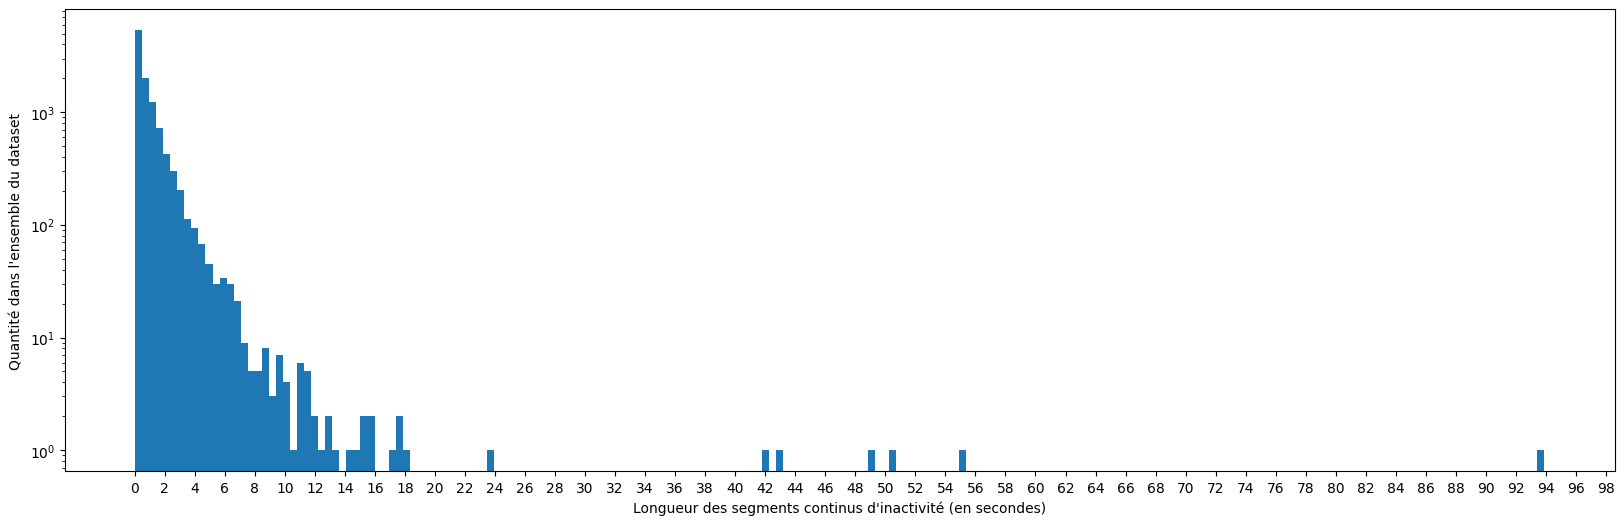

In [4]:
# x samples / (50 samples / sec) -> y sec
x = np.array(all_lengths) / 50
x = x[x < 100]
plt.figure(figsize=(20, 6))
plt.hist(x, bins=200)
plt.xticks(np.arange(0, 100, 2))
plt.yscale("log")
plt.xlabel("Longueur des segments continus d'inactivité (en secondes)")
plt.ylabel("Quantité dans l'ensemble du dataset")

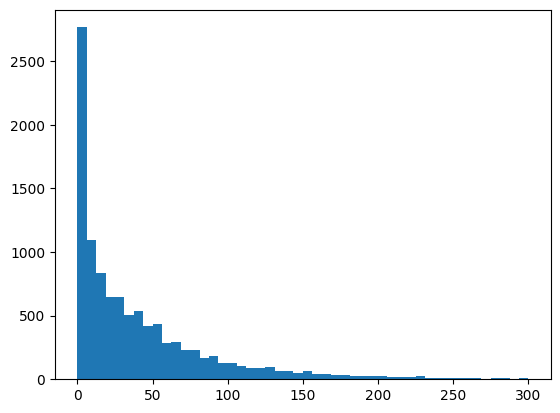

In [6]:
plt.hist(np.array(all_lengths), bins=np.linspace(0, 300, 49))
plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:08<00:00,  4.74it/s]
C:\Users\TomFi\AppData\Local\Temp\ipykernel_17988\2253104335.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


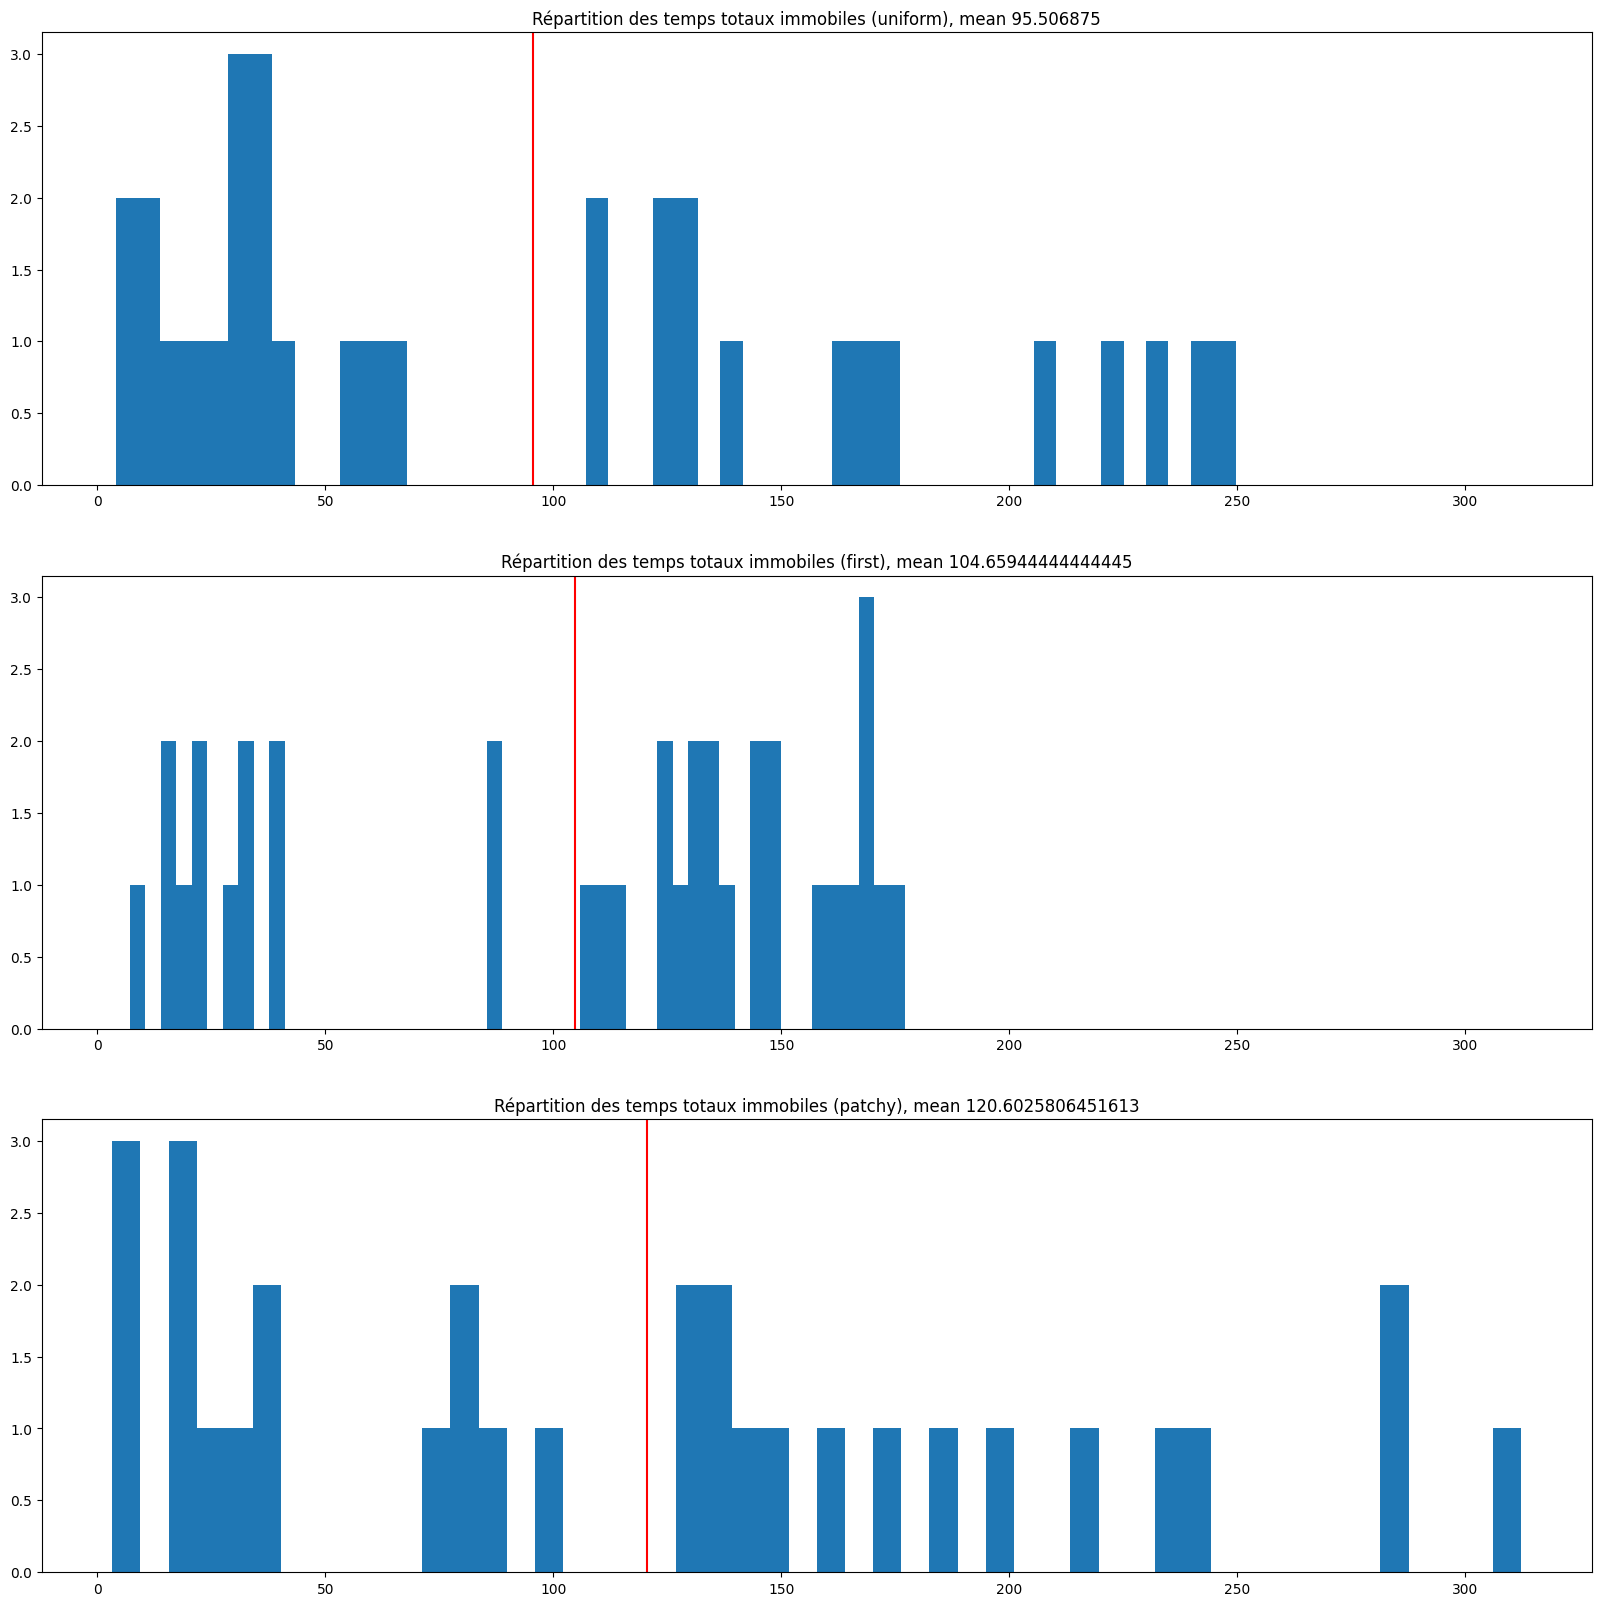

In [8]:
def compute_total_static_time(player_coords: List[TimeStampedCoordinates]):
    coords = to_vect([c["coord"] for c in player_coords])
    deriv = coords[1:] - coords[:-1]
    player_dist = np.linalg.norm(deriv, axis=1)
    return (player_dist == 0).sum() / 50  # 50 is the amount of samples / s


fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 20))
for session_type, ax in zip(SESSION_TYPES, axs):
    all_static_times = []
    for sample in tqdm(dataloader):
        trial = sample[session_type]
        if trial is not None:
            all_static_times.append(compute_total_static_time(trial.player_coords))
    ax.hist(all_static_times, bins=50)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.axvline(x=np.mean(all_static_times), color="red")
    ax.set_title(f"Répartition des temps totaux immobiles ({session_type}), mean {np.mean(all_static_times)}")
fig.show()
